# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных:**
* **id** — уникальный идентификатор скважины;
* **f0, f1, f2** — три признака точек;
* **product** — объём запасов в скважине (тыс. баррелей).

Данные синтетические.

## Загрузка и подготовка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Общая информация

In [2]:
# данные по первому региону
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv('https://datasets/geo_data_0.csv')

data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


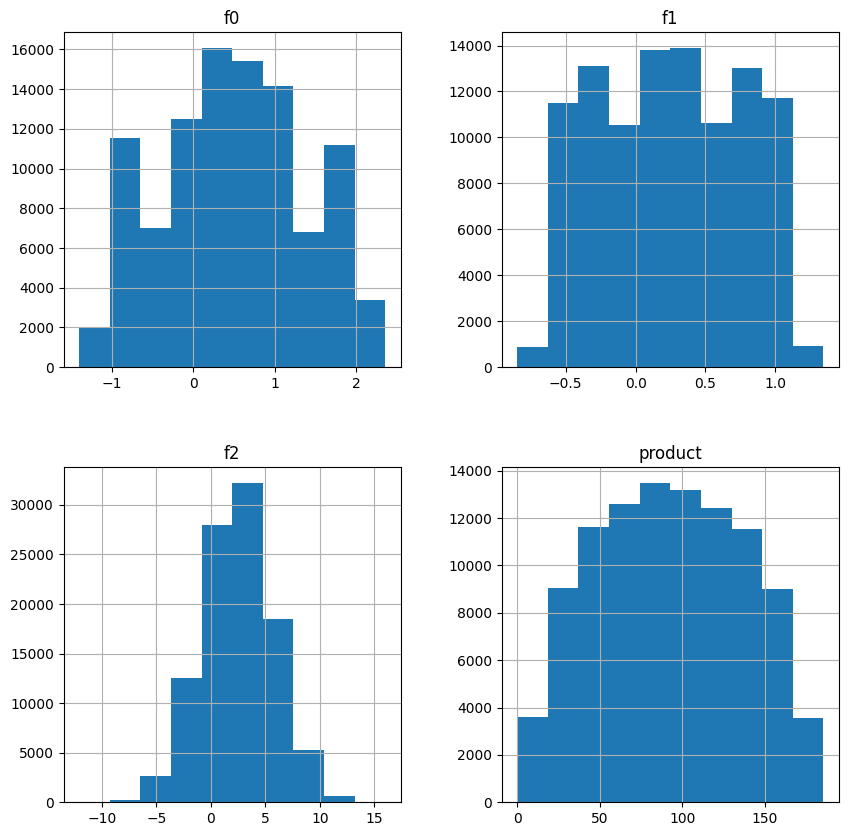

In [5]:
data_0.hist(figsize=(10, 10));

In [6]:
# данные по второму региону
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('https://datasets/geo_data_1.csv')

data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


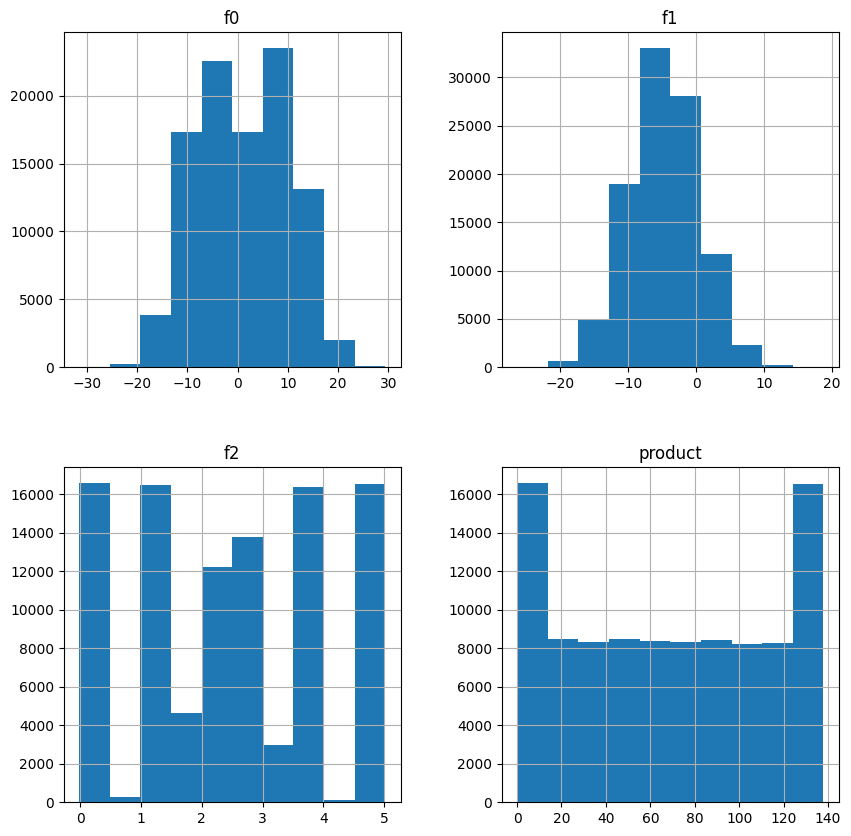

In [9]:
data_1.hist(figsize=(10, 10));

In [10]:
# данные по третьему региону
try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('https://datasets/geo_data_2.csv')

data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


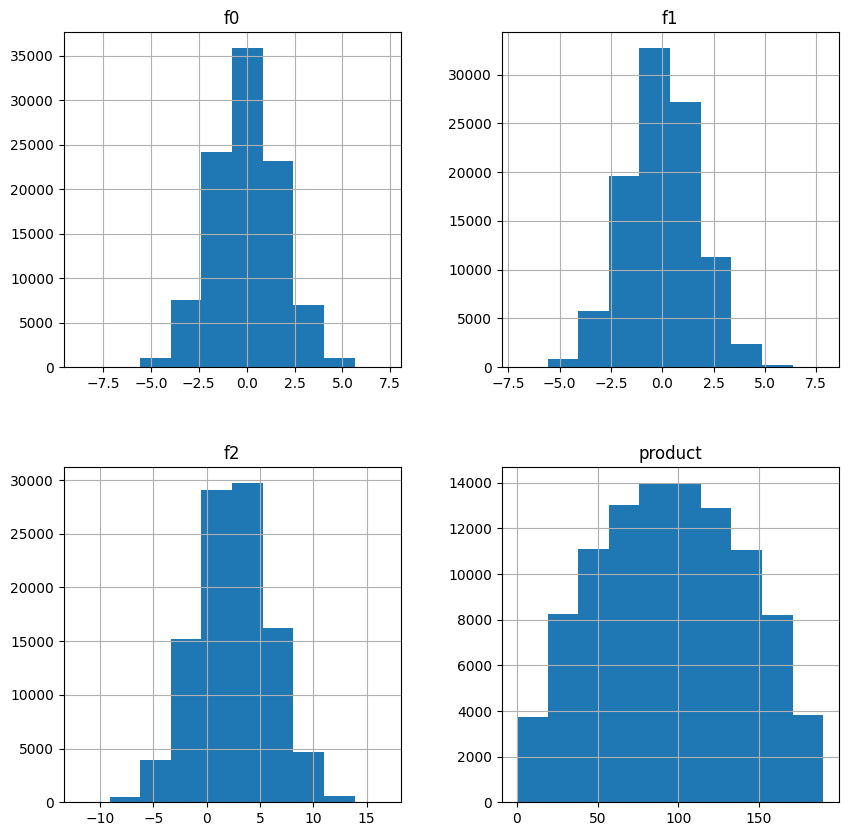

In [13]:
data_2.hist(figsize=(10, 10));

**Вывод:** Все три файла имеют одинаковый размер данных в 100 тыс. строк. Пропусков нет, типизация правильная. Данные по третьему региону имеют нормальное распределние. Странное распределение в столбце product и признаке f2 по второму региону, и в признаках f0 и f1 по первому региону. Других явных аномалий не замечено. 

### Предобработка

* Проверим данные на наличие дубликатов по столбцу id. 
* Информация об id - данные категориальные, кодировать их не имеет смысла, для прогнозирования моделей не важны - удалим столбцы
* Посмотрим ближе на распределение данных в признаках.
* Оценим количество нулевых значений в product по второму региону.

In [14]:
# первый регион
data_0.duplicated().sum()
data_0['id'].duplicated().sum()

10

In [15]:
# второй регион
data_1.duplicated().sum()
data_1['id'].duplicated().sum()

4

In [16]:
# третий регион
data_1.duplicated().sum()
data_1['id'].duplicated().sum()

4

В данных есть дубликаты, удалим их. После удалим столбец id во всех трех фреймах

In [17]:
# удаляем дубликаты
data_0 = data_0.drop_duplicates(subset='id', keep='first')
data_1 = data_1.drop_duplicates(subset='id', keep='first')
data_2 = data_2.drop_duplicates(subset='id', keep='first')

# удаляем столбцы
data_0.drop(['id'], axis=1, inplace=True)
data_1.drop(['id'], axis=1, inplace=True)
data_2.drop(['id'], axis=1, inplace=True)

In [18]:
# проверим размер
print('Размер data_0 :', data_0.shape)
print('Размер data_1 :', data_1.shape)
print('Размер data_2 :', data_2.shape)

Размер data_0 : (99990, 4)
Размер data_1 : (99996, 4)
Размер data_2 : (99996, 4)


Построим диаграммы размаха для признаков по всем трем регионам

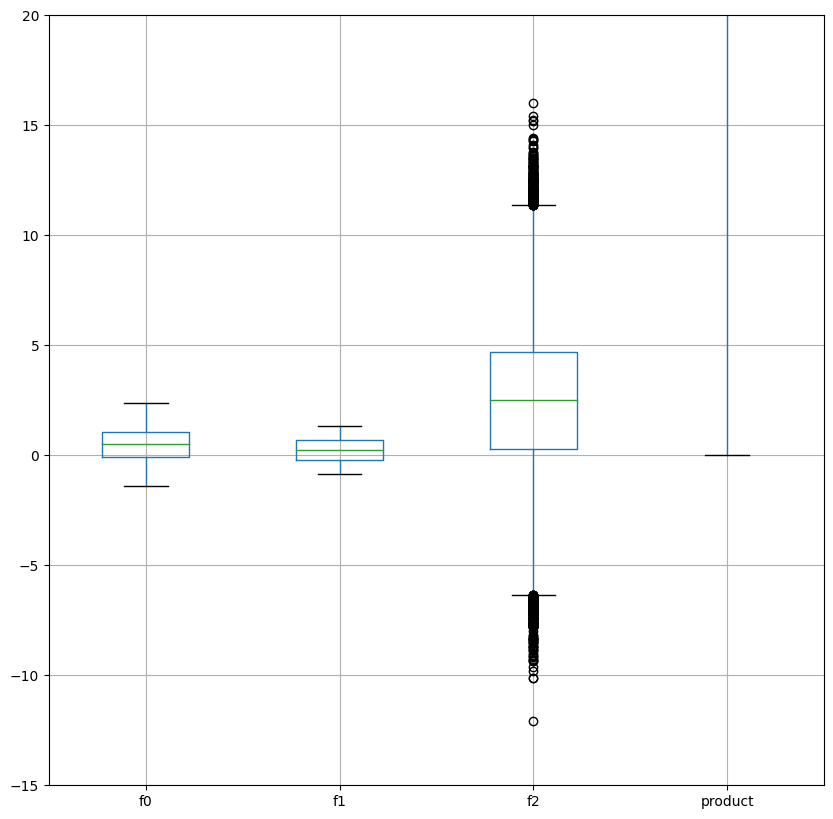

In [19]:
data_0.boxplot(figsize=(10, 10));
plt.ylim(-15, 20);

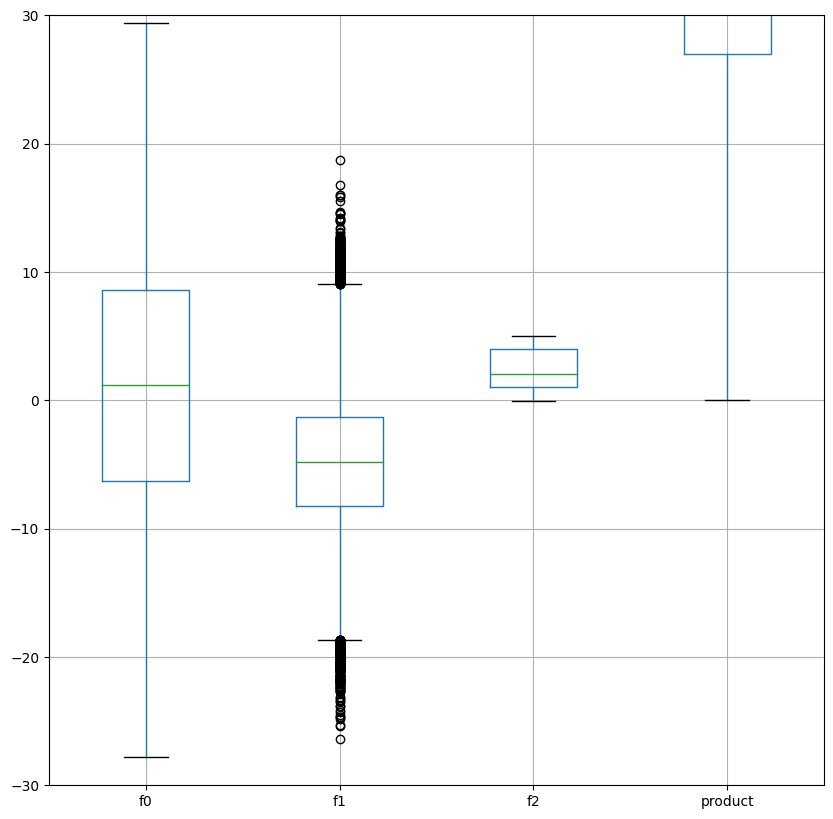

In [20]:
data_1.boxplot(figsize=(10, 10));
plt.ylim(-30, 30);

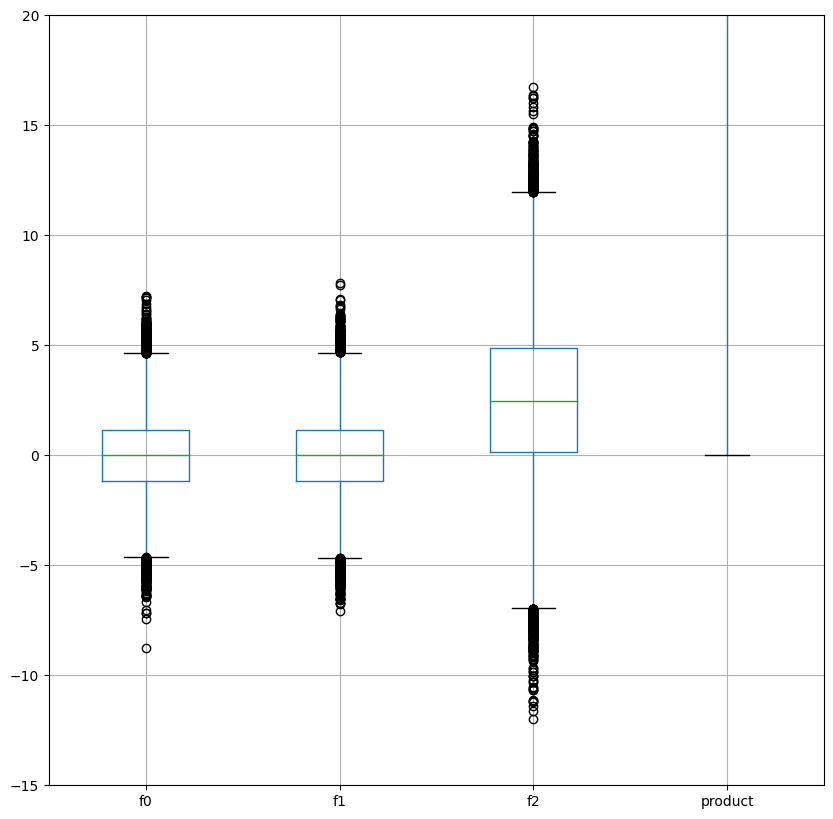

In [21]:
data_2.boxplot(figsize=(10, 10));
plt.ylim(-15, 20);

Обнаружены выбросы в признаках:
* Первый регион - f2
* Второй регион - f1
* Третий регион - во всех трех

Посмотрим количество нулей в product во втором фрейме

In [22]:
data_1_null = data_1[data_1['product'] == 0]['product'].count()
print('Процент нулевых значений во втором фрейме:', '{:.2%}'.format(data_1_null / data_1.shape[0]))

Процент нулевых значений во втором фрейме: 8.24%


**Вывод:** Данные очищены от дубликатов и выбросов. По второму региону объем запасов в скважине 8,24% значений нулевые. Можно предположить, что есть какая-то ошибка при внесении данных или это новые и еще не разработанные месторождения.

## Обучение и проверка модели

* Целевой признак - product.
* Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
* Обучим модель линейной регрессии и сделаем предсказания на валидационной выборке.
* Рассчитаем средний запас предсказанного сырья и RMSE модели.

### Формируем выборки

In [23]:
# выделим признаки
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']

features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

# разобьем данные
features_train_0, features_valid_0, target_train_0, target_valid_0 = (
    train_test_split(features_0, target_0, test_size = 0.25, random_state = 12345))

features_train_1, features_valid_1, target_train_1, target_valid_1 = (
    train_test_split(features_1, target_1, test_size = 0.25, random_state = 12345))

features_train_2, features_valid_2, target_train_2, target_valid_2 = (
    train_test_split(features_2, target_2, test_size = 0.25, random_state = 12345))

In [24]:
# разберы выборок
print('Первый регион')
print('Размер обучающей выборки:', target_train_0.shape[0])
print('Размер валидационной выборки:', target_valid_0.shape[0])

Первый регион
Размер обучающей выборки: 74992
Размер валидационной выборки: 24998


In [25]:
print('Второй регион')
print('Размер обучающей выборки:', target_train_1.shape[0])
print('Размер валидационной выборки:', target_valid_1.shape[0])

Второй регион
Размер обучающей выборки: 74997
Размер валидационной выборки: 24999


In [26]:
print('Третий регион')
print('Размер обучающей выборки:', target_train_2.shape[0])
print('Размер валидационной выборки:', target_valid_2.shape[0])

Третий регион
Размер обучающей выборки: 74997
Размер валидационной выборки: 24999


### Обучение модели

In [27]:
model = LinearRegression()
model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)

print('RMSE по первому региону :', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

model = LinearRegression()
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)

print('RMSE по второму региону :', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

model = LinearRegression()
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)

print('RMSE по третьему региону :', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

RMSE по первому региону : 37.853527328872964
RMSE по второму региону : 0.8920592647717025
RMSE по третьему региону : 40.07585073246016


In [28]:
# средний запас сырья
average_0 = predicted_target_0.mean()
average_1 = predicted_target_1.mean()
average_2 = predicted_target_2.mean()

print('Первый регион :', average_0)
print('Второй регион :', average_1)
print('Третий регион :', average_2)

Первый регион : 92.78915638280621
Второй регион : 69.17831957030432
Третий регион : 94.86572480562035


**Вывод:** Наименьший средний запас сырья у второго региона, как и корень из средней квадратичной ошибки - всего лишь 0,89, что по сравнению с двумя другими выглядит подозрительно неправдоподобно.

## Подготовка к расчёту прибыли

* Введем отдельные переменные, в которые поместим ключевые значения для расчётов.
* Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 
* Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [33]:
BUDGET = 10000000000 # бюджет, млрд рублей
ONE_BARREL = 450 # цена одно барреля сырья
PRICE_FOR_ONE = 450000 # доход с каждой единицы продукта, тыс. рублей
LOSS_PERCENT = 0.025 # порог вероятности убытков
BEST_POINT = 200 # лучшая точка для разработки
MAX_POINTS = 500 # всего точек

In [34]:
enough_volume = round((BUDGET/PRICE_FOR_ONE/BEST_POINT), 2)

print('Достаточный объем сырья для безубыточной разработки новой скважины :', 
      enough_volume, 'тыс. баррелей')

Достаточный объем сырья для безубыточной разработки новой скважины : 111.11 тыс. баррелей


In [35]:
print('Средний запас сырья к достаточному в первом регионе : {:,.2%}'
      .format(average_0/enough_volume))
print('Средний запас сырья к достаточному во втором регионе : {:,.2%}'
      .format(average_1/enough_volume))
print('Средний запас сырья к достаточному в третьем регионе : {:,.2%}'
      .format(average_2/enough_volume))

Средний запас сырья к достаточному в первом регионе : 83.51%
Средний запас сырья к достаточному во втором регионе : 62.26%
Средний запас сырья к достаточному в третьем регионе : 85.38%


**Вывод:** Средний фактический объем сырья по регионам меньше достаточного объема, чтобы разработать месторождения без убытков. Ближе всего к безубыточному показатель у третьего региона.

## Расчёт прибыли и рисков 

* Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

In [36]:
# функция для расчета прибыли
def calculation_income(target, predictions):
    target = target.reset_index(drop=True)
    predictions_sorted = predictions.sort_values(ascending=False)[:BEST_POINT]
    select = target.reindex(index=predictions_sorted.index)
    return PRICE_FOR_ONE * select.sum() - BUDGET

In [37]:
# функция bootstrap
state = np.random.RandomState(12345)

def bootstrap_1000(target, predictions):
    values = []
    loss = 0
    
    target = target.reset_index(drop=True)
    
    for i in range(1000):
        sample = target.sample(replace=True, random_state=state, n=MAX_POINTS)
        predict_sample = pd.Series(predictions).reindex(index=sample.index)
        income = calculation_income(target, predict_sample)
        if income <= 0:
            loss += 1
        values.append(income)
    
    values = pd.Series(values)
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    avg = values.mean()
    risk = loss / 1000
    
    return lower, upper, avg, risk

In [38]:
lower_0, upper_0, avg_0, risk_0 = bootstrap_1000(target_valid_0, predicted_target_0)

print('Средняя прибыль по первому региону = {:.2f}'.format(avg_0))
print('95% доверительный интервал от {:.2f} до {:.2f}'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Средняя прибыль по первому региону = 380613470.02
95% доверительный интервал от -142942739.74 до 890976833.85
Процент риска 7.70%


In [39]:
lower_1, upper_1, avg_1, risk_1 = bootstrap_1000(target_valid_1, predicted_target_1)

print('Средняя прибыль по второму региону = {:.2f}'.format(avg_1))
print('95% доверительный интервал от {:.2f} до {:.2f}'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Средняя прибыль по второму региону = 479159869.98
95% доверительный интервал от 73849212.02 до 917953817.72
Процент риска 0.60%


In [40]:
lower_2, upper_2, avg_2, risk_2 = bootstrap_1000(target_valid_2, predicted_target_2)

print('Средняя прибыль по третьему региону = {:.2f}'.format(avg_2))
print('95% доверительный интервал от {:.2f} до {:.2f}'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Средняя прибыль по третьему региону = 315441916.02
95% доверительный интервал от -216265050.03 до 811060708.24
Процент риска 12.40%


**Вывод:** По подсчитанным данным лучший регион для разработки - второй. У него наименьший процент убытков, выше средняя прибыль и доверительный интервал, по которому видно, что при худшем сценарии прибыль все равно будет. Однако, оценка всех трех регионов показала, что наиболее реалистичные значения у первого и третьего. Поэтому считаю, что и выбирать нужно только из этих двух регионов.

## Общий вывод

В ходе исследования был проведен анализ предоставленных данных по трем регионам:
* Изучена информация из файлов, проведена предобработка данных - убраны дубликаты и выбросы
* Были обучены модели линеной регрессии для каждого из регионов, подсчитан RSME и средний объем скважины по региону
* Найден достаточный объем для безубыточной разработки скважины. Сделан вывод, что ни в однм из регионов средний объем скважины не превышает достаточный. Наиболее близкий к данному числу - у третьего региона, на втором месте первый регион
* Подсчитаны средняя прибыль по региону и процент риска убытков. Выбран лучший регион - **второй**

Характеристика:
1. Первый регион 
- Средняя прибыль 381 млн. рублей
- Доверительный интервал от -143 млн до 891 млн
- Риск убытков 7,7%
- Средний запас сырья 93
2. Второй регион 
- Средняя прибыль 479 млн. рублей
- Доверительный интервал от 738 млн до 918 млн
- Риск убытков 0,6%
- Средний запас сырья 69
3. Третий регион
- Средняя прибыль 315 млн. рублей
- Доверительный интервал от -216 млн до 811 млн
- Риск убытков 12,4%
- Средний запас сырья 95